# Optimisation dans le cas continu

L'algorithme d'optimisation par essaims particulaires (PSO) est une méthode métaheuristique qui s'inspire du comportement social des oiseaux ou des poissons pour résoudre des problèmes d'optimisation. L'idée principale est de faire évoluer un groupe de particules (représentant des solutions potentielles) dans l'espace de recherche en fonction de leur expérience individuelle et de l'expérience du groupe.


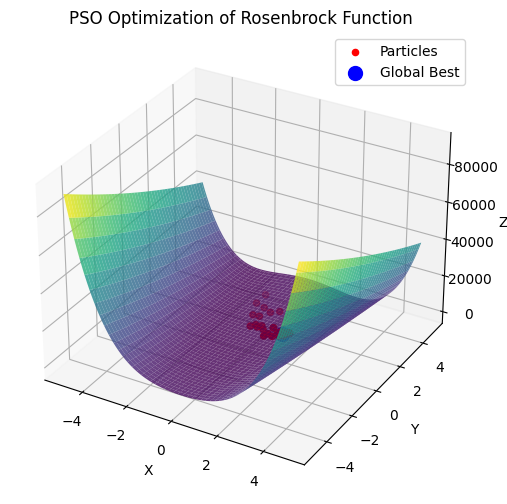

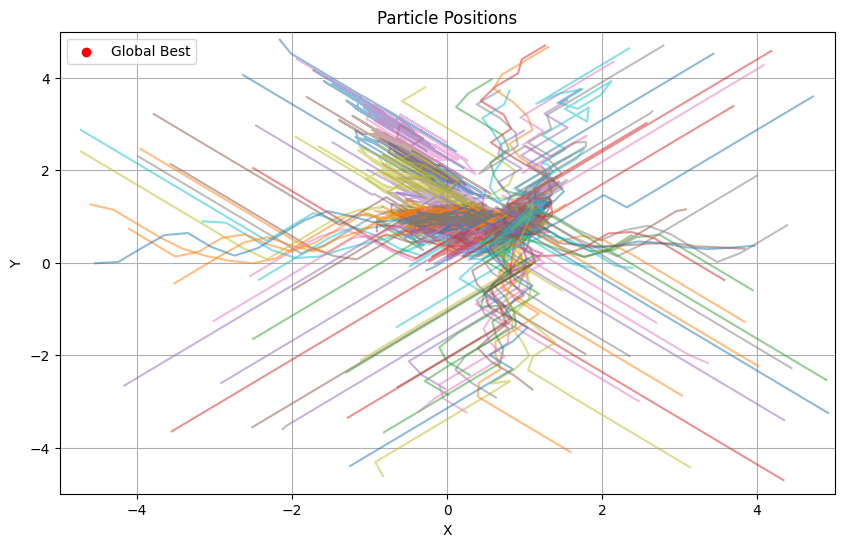

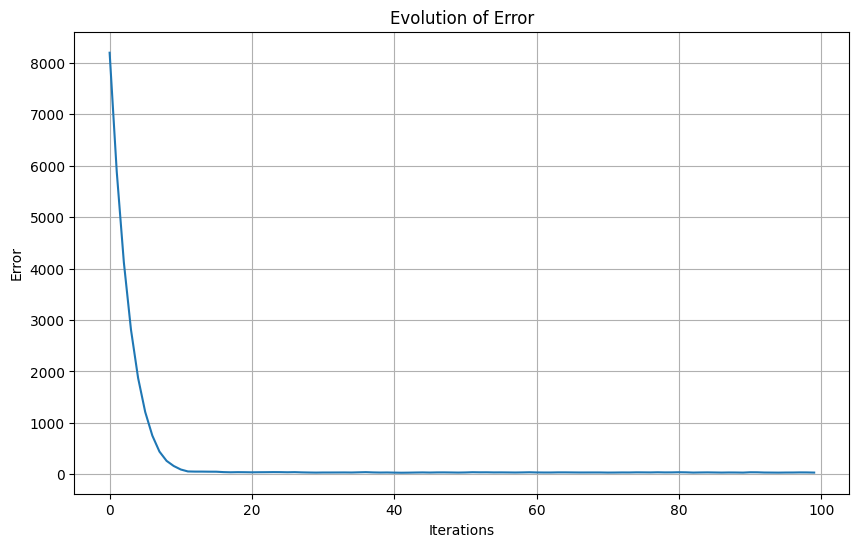

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fonction Rosenbrock
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Paramètres PSO
n_particles = 100
max_iterations = 100
xlim = (-5, 5)
ylim = (-5, 5)
w = 0.8
c1 = 2
c2 = 2
v_max = 0.3

# Initialisation
particles_position = np.random.uniform(low=[xlim[0], ylim[0]], high=[xlim[1], ylim[1]], size=(n_particles, 2))
particles_velocity = np.zeros_like(particles_position)
best_position = particles_position.copy()
global_best_position = particles_position[np.argmin(rosenbrock(particles_position[:, 0], particles_position[:, 1]))]

# Stockage des erreurs
errors = []

# Stockage des positions des particules à chaque itération
particles_history = []

# PSO main loop
for _ in range(max_iterations):
    particles_history.append(particles_position.copy())

    for i in range(n_particles):
        r1, r2 = np.random.rand(2)
        particles_velocity[i] = (w * particles_velocity[i] +
                                  c1 * r1 * (best_position[i] - particles_position[i]) +
                                  c2 * r2 * (global_best_position - particles_position[i]))

        particles_velocity[i] = np.clip(particles_velocity[i], -v_max, v_max)
        particles_position[i] += particles_velocity[i]

        particles_position[i] = np.clip(particles_position[i], [xlim[0], ylim[0]], [xlim[1], ylim[1]])

        if rosenbrock(*particles_position[i]) < rosenbrock(*best_position[i]):
            best_position[i] = particles_position[i].copy()
            if rosenbrock(*best_position[i]) < rosenbrock(*global_best_position):
                global_best_position = best_position[i].copy()

    # Calcul de l'erreur
    error = np.mean(rosenbrock(particles_position[:, 0], particles_position[:, 1]))
    errors.append(error)

# Plot de la fonction Rosenbrock
x = np.linspace(xlim[0], xlim[1], 100)
y = np.linspace(ylim[0], ylim[1], 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(particles_position[:, 0], particles_position[:, 1], rosenbrock(*particles_position.T), color='r', label='Particles')
ax.scatter(global_best_position[0], global_best_position[1], rosenbrock(*global_best_position), color='b', s=100, label='Global Best')
ax.set_title('PSO Optimization of Rosenbrock Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Plot des positions des particules
particles_history = np.array(particles_history)
plt.figure(figsize=(10, 6))
for i in range(n_particles):
    plt.plot(particles_history[:, i, 0], particles_history[:, i, 1], alpha=0.5)
plt.scatter(global_best_position[0], global_best_position[1], color='r', label='Global Best')
plt.title('Particle Positions')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.grid(True)

# Plot de l'erreur
fig = plt.figure(figsize=(10, 6))
plt.plot(errors)
plt.title("Evolution of Error")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.grid(True)

plt.show()



Stopping search: Swarm best objective change less than 1e-08


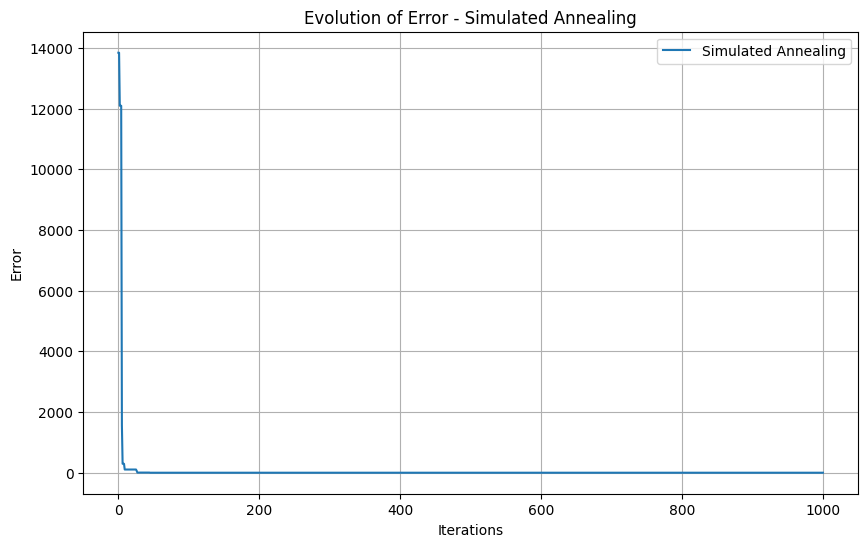

In [ ]:

# Fonction Rosenbrock
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Algorithme de recuit simulé
def simulated_annealing(cost_func, x_init, y_init, max_iterations=1000, initial_temperature=1.0, cooling_rate=0.99):
    x_current, y_current = x_init, y_init
    best_x, best_y = x_current, y_current
    current_temperature = initial_temperature
    best_cost = cost_func(x_current, y_current)

    errors = [best_cost]

    for i in range(max_iterations):
        x_new, y_new = np.random.uniform(-5, 5), np.random.uniform(-5, 5)
        new_cost = cost_func(x_new, y_new)
        cost_diff = new_cost - best_cost

        if cost_diff < 0 or np.random.rand() < np.exp(-cost_diff / current_temperature):
            x_current, y_current = x_new, y_new
            best_cost = new_cost
            if new_cost < best_cost:
                best_x, best_y = x_new, y_new

        current_temperature *= cooling_rate
        errors.append(best_cost)

    return best_x, best_y, errors

# Initialisation des paramètres
x_init, y_init = np.random.uniform(-5, 5), np.random.uniform(-5, 5)
max_iterations = 100

# Exécution de l'algorithme de recuit simulé
best_x_sa, best_y_sa, errors_sa = simulated_annealing(rosenbrock, x_init, y_init)

# Exécution de l'algorithme des essaims particulaires (PSO)
from pyswarm import pso

def cost_function(x):
    return rosenbrock(x[0], x[1])

lb = [-5, -5]
ub = [5, 5]

best_position_pso, _ = pso(cost_function, lb, ub, swarmsize=100, maxiter=1000)
best_x_pso, best_y_pso = best_position_pso

# Affichage de l'évolution de l'erreur en fonction des itérations
plt.figure(figsize=(10, 6))
plt.plot(errors_sa, label='Simulated Annealing')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Evolution of Error - Simulated Annealing')
plt.legend()
plt.grid(True)
plt.show()

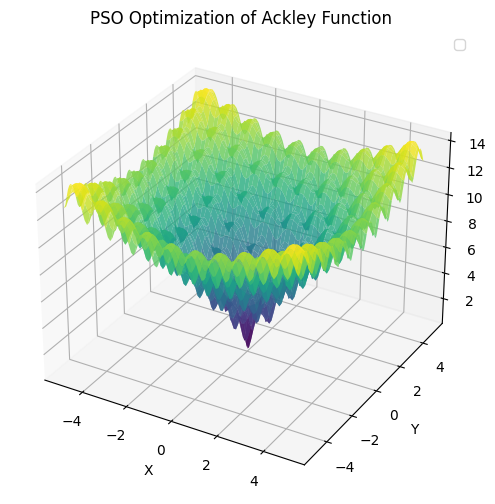

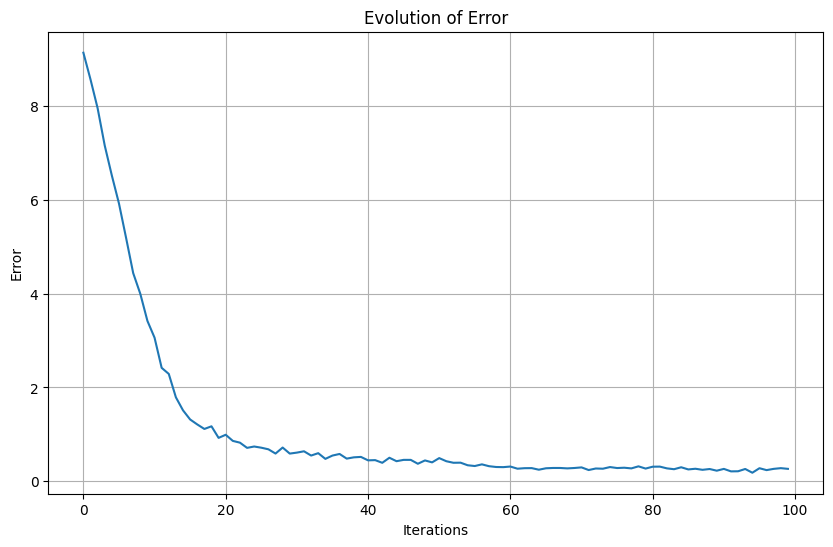

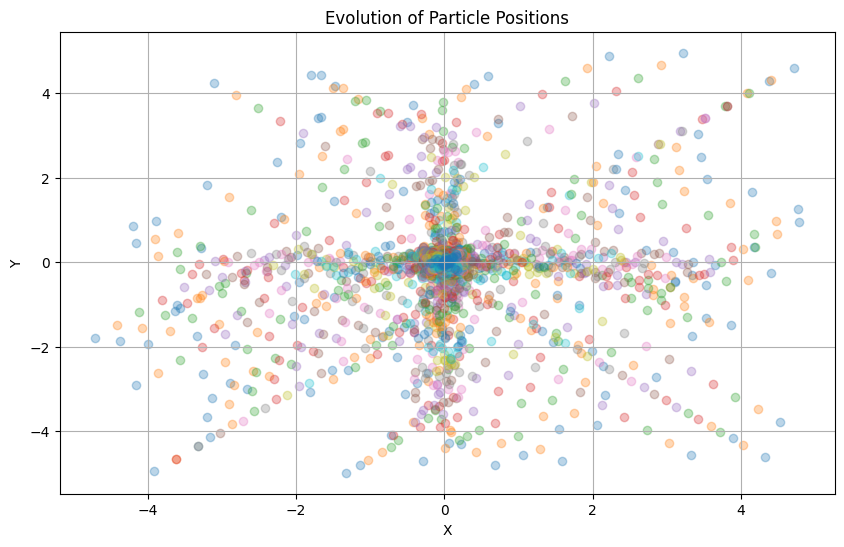

In [ ]:


# Définition de la fonction Ackley
def ackley(x, y):
    a = 20
    b = 0.2
    c = 2 * np.pi
    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
    return term1 + term2 + a + np.exp(1)

# Paramètres PSO
n_particles = 100
max_iterations = 100
xlim = (-5, 5)
ylim = (-5, 5)
w = 0.8
c1 = 2
c2 = 2
v_max = 0.3

# Initialisation des particules
particles_position = np.random.uniform(low=[xlim[0], ylim[0]], high=[xlim[1], ylim[1]], size=(n_particles, 2))
particles_velocity = np.zeros_like(particles_position)
best_position = particles_position.copy()
global_best_position = particles_position[np.argmin(ackley(particles_position[:, 0], particles_position[:, 1]))]

# Stockage des erreurs
errors = []
particle_positions_evolution = [particles_position.copy()]

# Boucle principale PSO
for _ in range(max_iterations):
    for i in range(n_particles):
        r1, r2 = np.random.rand(2)
        particles_velocity[i] = (w * particles_velocity[i] +
                                  c1 * r1 * (best_position[i] - particles_position[i]) +
                                  c2 * r2 * (global_best_position - particles_position[i]))

        particles_velocity[i] = np.clip(particles_velocity[i], -v_max, v_max)
        particles_position[i] += particles_velocity[i]

        particles_position[i] = np.clip(particles_position[i], [xlim[0], ylim[0]], [xlim[1], ylim[1]])

        if ackley(*particles_position[i]) < ackley(*best_position[i]):
            best_position[i] = particles_position[i].copy()
            if ackley(*best_position[i]) < ackley(*global_best_position):
                global_best_position = best_position[i].copy()

    # Calcul de l'erreur
    error = np.mean(ackley(particles_position[:, 0], particles_position[:, 1]))
    errors.append(error)

    # Sauvegarde des positions des particules
    particle_positions_evolution.append(particles_position.copy())

# Affichage de la fonction Ackley
x = np.linspace(xlim[0], xlim[1], 100)
y = np.linspace(ylim[0], ylim[1], 100)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
#ax.scatter(particles_position[:, 0], particles_position[:, 1], ackley(*particles_position.T), color='r', label='Particles')
#ax.scatter(global_best_position[0], global_best_position[1], ackley(*global_best_position), color='b', s=100, label='Global Best')
ax.set_title('PSO Optimization of Ackley Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Affichage de l'erreur
plt.figure(figsize=(10, 6))
plt.plot(errors)
plt.title("Evolution of Error")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.grid(True)

# Affichage de l'évolution des positions des particules
fig = plt.figure(figsize=(10, 6))
for i in range(max_iterations + 1):
    plt.scatter(particle_positions_evolution[i][:, 0], particle_positions_evolution[i][:, 1], alpha=0.3, label=f"Iteration {i}")
plt.title("Evolution of Particle Positions")
plt.xlabel('X')
plt.ylabel('Y')

plt.grid(True)

plt.show()


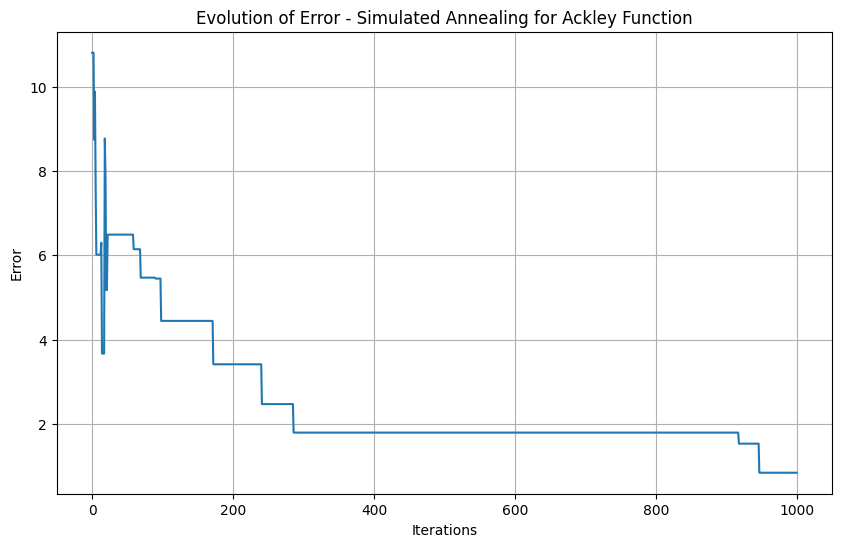

In [ ]:
# Algorithme de recuit simulé
def simulated_annealing(cost_func, x_init, y_init, max_iterations=1000, initial_temperature=1.0, cooling_rate=0.99):
    x_current, y_current = x_init, y_init
    best_x, best_y = x_current, y_current
    current_temperature = initial_temperature
    best_cost = cost_func(x_current, y_current)

    errors = [best_cost]

    for i in range(max_iterations):
        x_new, y_new = np.random.uniform(-5, 5), np.random.uniform(-5, 5)
        new_cost = cost_func(x_new, y_new)
        cost_diff = new_cost - best_cost

        if cost_diff < 0 or np.random.rand() < np.exp(-cost_diff / current_temperature):
            x_current, y_current = x_new, y_new
            best_cost = new_cost
            if new_cost < best_cost:
                best_x, best_y = x_new, y_new

        current_temperature *= cooling_rate
        errors.append(best_cost)

    return best_x, best_y, errors

# Initialisation des paramètres
x_init, y_init = np.random.uniform(-5, 5), np.random.uniform(-5, 5)
max_iterations = 1000

# Exécution de l'algorithme de recuit simulé
best_x_sa, best_y_sa, errors_sa = simulated_annealing(ackley, x_init, y_init)

# Affichage de l'évolution de l'erreur en fonction des itérations
plt.figure(figsize=(10, 6))
plt.plot(errors_sa)
plt.title("Evolution of Error - Simulated Annealing for Ackley Function")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.grid(True)
plt.show()

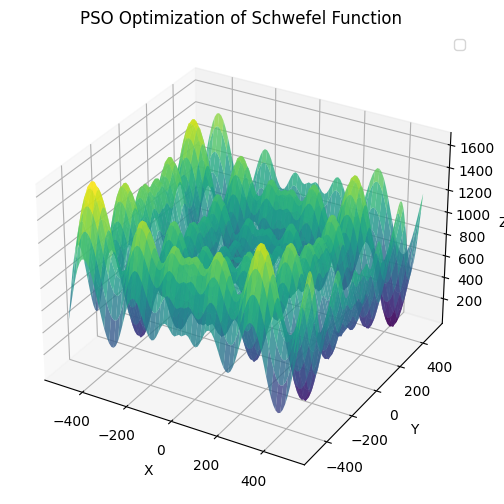

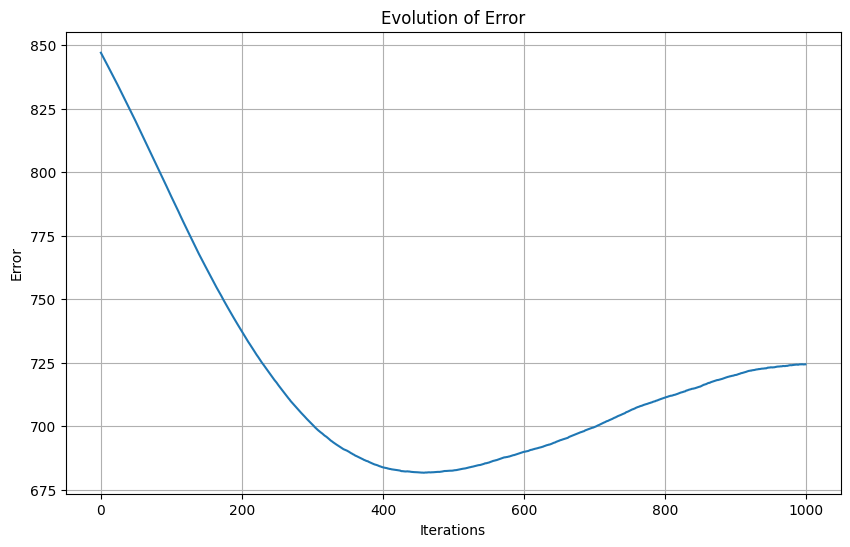

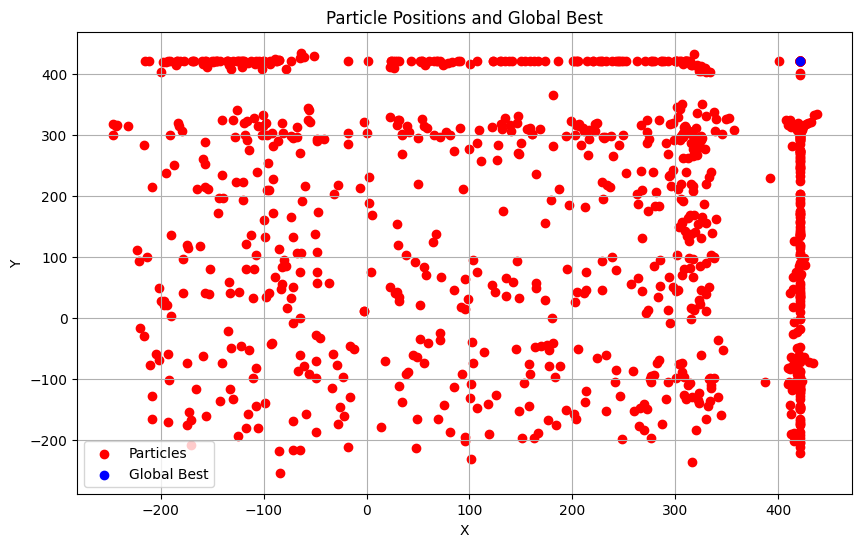

In [ ]:


# Définition de la fonction de Schwefel
def schwefel(x, y):
    return 418.9829 * 2 - x * np.sin(np.sqrt(np.abs(x))) - y * np.sin(np.sqrt(np.abs(y)))

# Paramètres PSO
n_particles = 1000
max_iterations = 1000
xlim = (-500, 500)
ylim = (-500, 500)
w = 0.72984
c1 = 1.496172
c2 = 1.496172
v_max = 0.3

# Initialisation des particules
particles_position = np.random.uniform(low=[xlim[0], ylim[0]], high=[xlim[1], ylim[1]], size=(n_particles, 2))
particles_velocity = np.zeros_like(particles_position)
best_position = particles_position.copy()
global_best_position = particles_position[np.argmin(schwefel(particles_position[:, 0], particles_position[:, 1]))]

# Stockage des erreurs
errors = []

# Boucle principale PSO
for _ in range(max_iterations):
    for i in range(n_particles):
        r1, r2 = np.random.rand(2)
        particles_velocity[i] = (w * particles_velocity[i] +
                                  c1 * r1 * (best_position[i] - particles_position[i]) +
                                  c2 * r2 * (global_best_position - particles_position[i]))

        particles_velocity[i] = np.clip(particles_velocity[i], -v_max, v_max)
        particles_position[i] += particles_velocity[i]

        particles_position[i] = np.clip(particles_position[i], [xlim[0], ylim[0]], [xlim[1], ylim[1]])

        if schwefel(*particles_position[i]) < schwefel(*best_position[i]):
            best_position[i] = particles_position[i].copy()
            if schwefel(*best_position[i]) < schwefel(*global_best_position):
                global_best_position = best_position[i].copy()

    # Calcul de l'erreur
    error = np.mean(schwefel(particles_position[:, 0], particles_position[:, 1]))
    errors.append(error)

# Affichage de la fonction de Schwefel
x = np.linspace(xlim[0], xlim[1], 100)
y = np.linspace(ylim[0], ylim[1], 100)
X, Y = np.meshgrid(x, y)
Z = schwefel(X, Y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
#ax.scatter(particles_position[:, 0], particles_position[:, 1], schwefel(*particles_position.T), color='r', label='Particles')
#ax.scatter(global_best_position[0], global_best_position[1], schwefel(*global_best_position), color='b', s=100, label='Global Best')
ax.set_title('PSO Optimization of Schwefel Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Affichage de l'erreur
plt.figure(figsize=(10, 6))
plt.plot(errors)
plt.title("Evolution of Error")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.grid(True)

# Affichage des positions des particules et de la valeur du minimum retourné
plt.figure(figsize=(10, 6))
plt.scatter(particles_position[:, 0], particles_position[:, 1], c='r', label='Particles')
plt.scatter(global_best_position[0], global_best_position[1], c='b', label='Global Best')
plt.title("Particle Positions and Global Best")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.show()


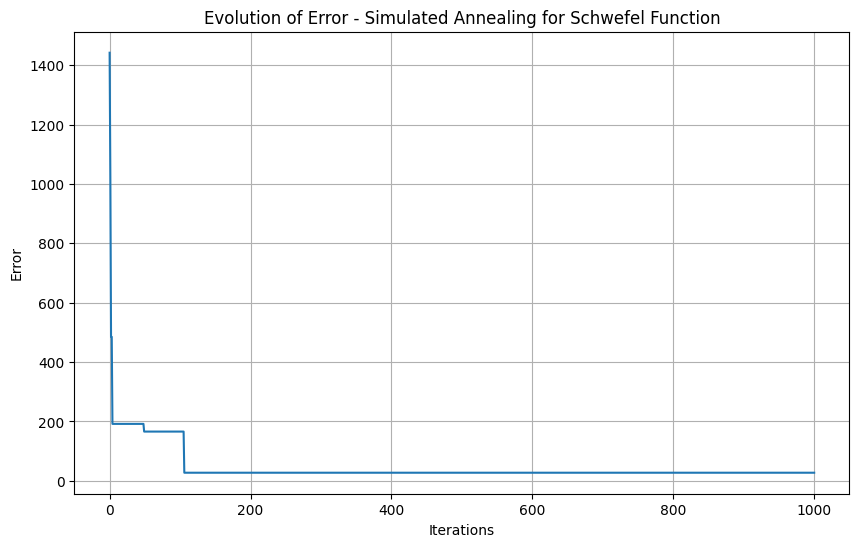

In [ ]:
# Algorithme de recuit simulé
def simulated_annealing(cost_func, x_init, y_init, max_iterations=1000, initial_temperature=1.0, cooling_rate=0.99):
    x_current, y_current = x_init, y_init
    best_x, best_y = x_current, y_current
    current_temperature = initial_temperature
    best_cost = cost_func(x_current, y_current)

    errors = [best_cost]

    for i in range(max_iterations):
        x_new, y_new = np.random.uniform(-500, 500), np.random.uniform(-500, 500)
        new_cost = cost_func(x_new, y_new)
        cost_diff = new_cost - best_cost

        if cost_diff < 0 or np.random.rand() < np.exp(-cost_diff / current_temperature):
            x_current, y_current = x_new, y_new
            best_cost = new_cost
            if new_cost < best_cost:
                best_x, best_y = x_new, y_new

        current_temperature *= cooling_rate
        errors.append(best_cost)

    return best_x, best_y, errors

# Initialisation des paramètres
x_init, y_init = np.random.uniform(-500, 500), np.random.uniform(-500, 500)
max_iterations = 1000

# Exécution de l'algorithme de recuit simulé
best_x_sa, best_y_sa, errors_sa = simulated_annealing(schwefel, x_init, y_init)

# Affichage de l'évolution de l'erreur en fonction des itérations
plt.figure(figsize=(10, 6))
plt.plot(errors_sa)
plt.title("Evolution of Error - Simulated Annealing for Schwefel Function")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.grid(True)
plt.show()